# Dependencies

In [1]:
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

# Load Model

In [3]:
# Load dataset
df = pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# EDA & Preprocessing

In [4]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 10000
Number of columns: 10


In [6]:
# Drop unnecessary columns
df = df.drop(['UDI'], axis=1)
df = df.reset_index(drop=True)
df = df.drop(['Product ID'], axis=1)
df = df.reset_index(drop=True)
df = df.drop(['Type'], axis=1)
df = df.reset_index(drop=True)
df = df.drop(['Target'], axis=1)
df = df.reset_index(drop=True)
df = df.drop(['Failure Type'], axis=1)
df = df.reset_index(drop=True)
df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [7]:
df = df.rename(columns={'Air temperature [K]': 'Air temperature',
                                'Process temperature [K]': 'Process temperature',
                                'Rotational speed [rpm]': 'Rotational speed',
                                'Torque [Nm]': 'Torque',
                                'Tool wear [min]': 'Tool wear',
                                })
df.columns

Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear'],
      dtype='object')

/tmp/ipykernel_60867/1418410714.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


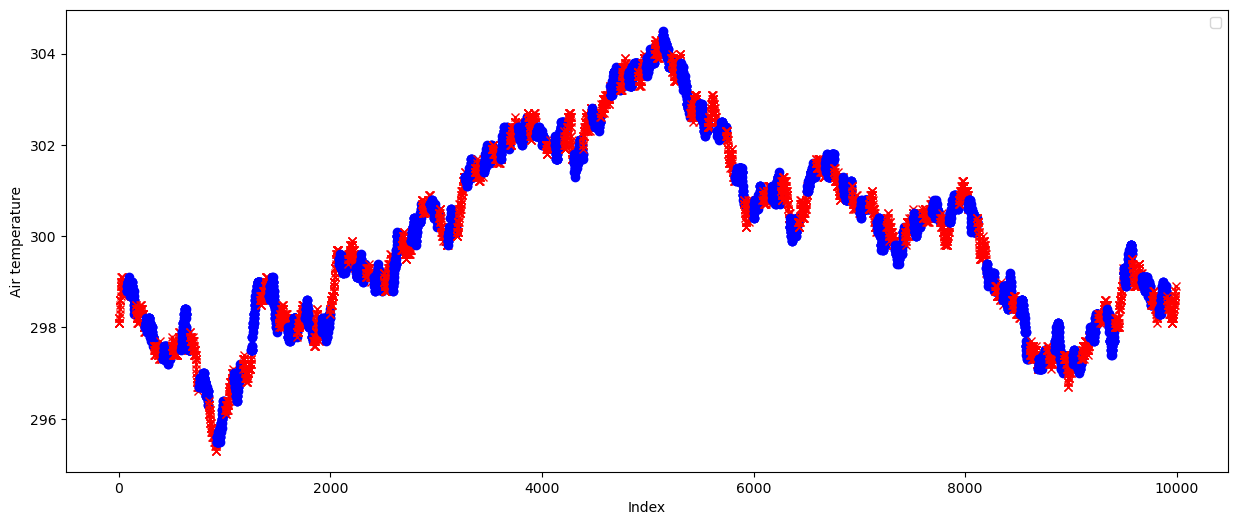

In [28]:
lower_lim = 0
counter = 0

plt.figure(figsize=(15, 6))

for upper_lim in list(df[df["Tool wear"] == 0].index):
    y = df.iloc[lower_lim:upper_lim]["Air temperature"]
    x = y.index

    if counter % 2 == 0:
        plt.plot(x, y, color='blue', linestyle='-', marker='o')
    else:
        plt.plot(x, y, color='red', linestyle='-', marker='x')

    counter += 1
    lower_lim = upper_lim

plt.xlabel("Index")
plt.ylabel("Air temperature")

plt.legend()
plt.show()

In [ ]:
cobacobay = df.iloc[0:78]["Air temperature [K]"]
cobacobax = list(cobacobay.index)

plt.plot(cobacobax, cobacobay, color='blue', linestyle='-', marker='o', label='Series A')

# Adding labels and title
plt.xlabel("Time (Units)")
plt.ylabel("Value")

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
cobacoba = df.iloc[0:162]["Air temperature [K]"]
cobacobax = list(cobacoba.index)

cobacoba2 = df.iloc[162:250]["Air temperature [K]"]
cobacobax2 = list(cobacoba2.index)

plt.plot(cobacobax, cobacoba, color='blue', linestyle='-', marker='o')
plt.plot(cobacobax2, cobacoba2, color='red', linestyle='-', marker='x')

# Adding labels and title
plt.xlabel("Time (Units)")
plt.ylabel("Value")

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

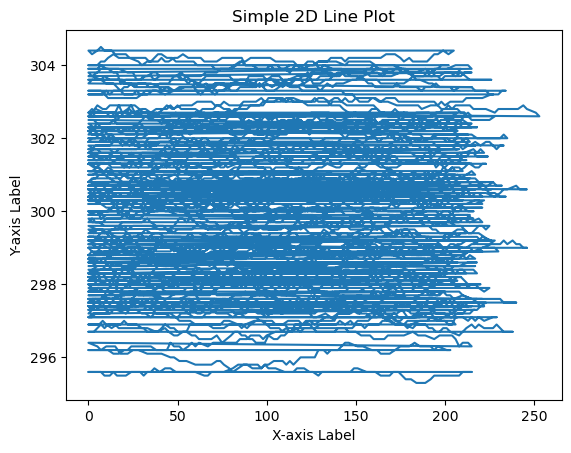

In [10]:
# Create the line plot

x = df["Tool wear"]
y = df["Air temperature"]

plt.plot(x, y)

# Add labels and a title for clarity
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Simple 2D Line Plot")

# Display the plot
plt.show()

# EDA & Preprocessing

In [ ]:
# dataset information
df.info()

In [ ]:
df["UDI"].value_counts()

In [ ]:
# Hapus kolom UDI, karena hanya sebagai ID
df = df.drop(['UDI'], axis=1)
df = df.reset_index(drop=True)
df.columns

In [ ]:
df["Product ID"].value_counts()

In [ ]:
# Hapus kolom Product ID, karena hanya sebagai ID
df = df.drop(['Product ID'], axis=1)
df = df.reset_index(drop=True)
df.columns

In [ ]:
ax = df["Type"].value_counts().sort_index() \
    .plot(kind='bar',
          figsize=(5, 5))
ax.set_xlabel('Type')
plt.xticks(rotation=0)
plt.show()

In [ ]:
plt.plot(df["Air temperature [K]"])
plt.show()

In [ ]:
plt.plot(df["Process temperature [K]"])
plt.show()

In [ ]:
plt.plot(df["Rotational speed [rpm]"])
plt.show()

In [ ]:
plt.plot(df["Torque [Nm]"])
plt.show()

In [ ]:
plt.plot(df["Tool wear [min]"])
plt.show()

In [ ]:
ax = df["Target"].value_counts().sort_index() \
    .plot(kind='bar',
          figsize=(5, 5))
ax.set_xlabel('Target')
plt.xticks(rotation=0)
plt.show()

In [ ]:
ax = df["Failure Type"].value_counts().sort_index() \
    .plot(kind='bar',
          figsize=(5, 5))
ax.set_xlabel('Target')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Drop duplicated rows
print("Number of duplicated rows:", df.shape[0] - df.drop_duplicates().shape[0])
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df.shape[0] - df.drop_duplicates().shape[0])